In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.model_selection import  cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [2]:
zoo = pd.read_csv('D:\\EXCEL R\\ASSIGNMENTS\\KNN CLass\\zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
zoo.rename(columns={'animal name': 'animal'}, inplace=True)
zoo

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
zoo.animal.value_counts()

frog        2
raccoon     1
newt        1
kiwi        1
hare        1
           ..
oryx        1
termite     1
buffalo     1
scorpion    1
piranha     1
Name: animal, Length: 100, dtype: int64

In [5]:
zoo.shape


(101, 18)

In [6]:
zoo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   animal    101 non-null    object
 1   hair      101 non-null    int64 
 2   feathers  101 non-null    int64 
 3   eggs      101 non-null    int64 
 4   milk      101 non-null    int64 
 5   airborne  101 non-null    int64 
 6   aquatic   101 non-null    int64 
 7   predator  101 non-null    int64 
 8   toothed   101 non-null    int64 
 9   backbone  101 non-null    int64 
 10  breathes  101 non-null    int64 
 11  venomous  101 non-null    int64 
 12  fins      101 non-null    int64 
 13  legs      101 non-null    int64 
 14  tail      101 non-null    int64 
 15  domestic  101 non-null    int64 
 16  catsize   101 non-null    int64 
 17  type      101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [12]:
features = list(zoo.columns)
print(features)

['animal', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']


In [13]:
features.remove('type')
features.remove('animal')

print(features)

['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']


In [14]:
X = zoo[features].values.astype(np.float32)
Y = zoo.type


print(X.shape)
print(Y.shape)

(101, 16)
(101,)


In [15]:
num_folds = 10
kfold = KFold(n_splits=10)

In [16]:
model = KNeighborsClassifier(n_neighbors=10)
results = cross_val_score(model, X, Y, cv=kfold)

In [17]:
print(results.mean())

0.78


In [18]:
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [19]:
n_neighbors = numpy.array(range(1,80))
param_grid = dict(n_neighbors=n_neighbors)

In [20]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

D:\anaconda\envs\xyz\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])})

In [21]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


D:\anaconda\envs\xyz\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
D:\anaconda\envs\xyz\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
D:\anaconda\envs\xyz\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
D:\anaconda\envs\xyz\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
D:\anaconda\envs\xyz\lib\site-packages\sklearn\model_selecti

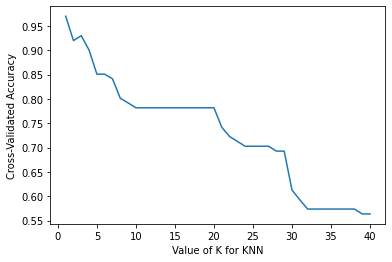

In [22]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 0)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50, 16)
(50,)
(51, 16)
(51,)


In [25]:
# using logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)
print("training accuracy :", model.score(X_train, Y_train))
print("testing accuracy :", model.score(X_test, Y_test))

training accuracy : 1.0
testing accuracy : 0.9215686274509803


In [27]:
# using descision tree classifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
print("training accuracy :", model.score(X_train, Y_train))
print("testing accuracy :", model.score(X_test, Y_test))

training accuracy : 1.0
testing accuracy : 0.9215686274509803


In [28]:
# using randam forest classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, Y_train)
print("training accuracy :", model.score(X_train, Y_train))
print("testing accuracy :", model.score(X_test, Y_test))

training accuracy : 1.0
testing accuracy : 0.9215686274509803


In [29]:
# using support vector machines
from sklearn.svm import SVC

model = SVC(kernel = "rbf", C = 1.0, gamma = 0.1)
model.fit(X_train, Y_train)
print("training accuracy :", model.score(X_train, Y_train))
print("testing accuracy :", model.score(X_test, Y_test))

training accuracy : 0.98
testing accuracy : 0.8235294117647058


In [30]:
# using ada boost classifier
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, Y_train)
print("training accuracy :", model.score(X_train, Y_train))
print("testing accuracy :", model.score(X_test, Y_test))

training accuracy : 0.82
testing accuracy : 0.5882352941176471
